# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


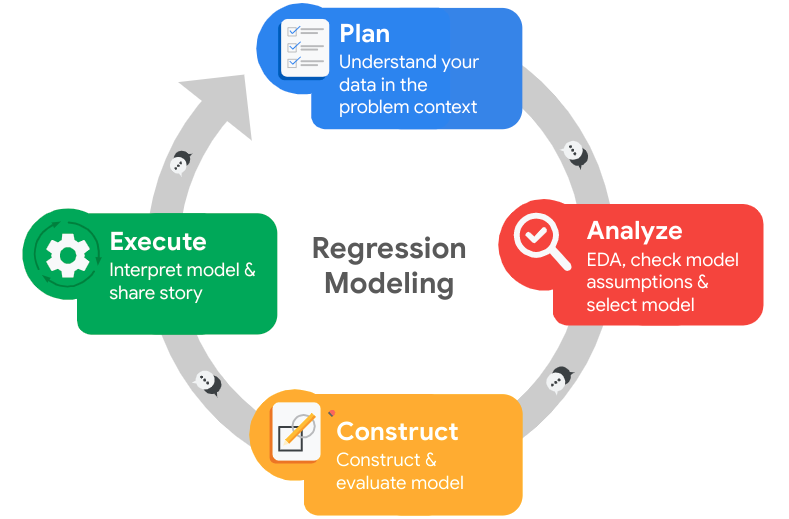

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident':'work_accident',
                          'Department': 'department',
                          'average_montly_hours': 'average_monthly_hours'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

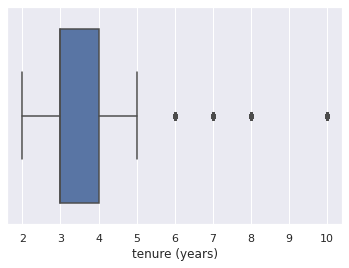

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.set()
sns.boxplot(x=df['time_spend_company'])
plt.xlabel('tenure (years)')
plt.show()

In [12]:
# Determine the number of rows containing outliers
tenure_3q = df['time_spend_company'].quantile(0.75)
tenure_1q = df['time_spend_company'].quantile(0.25)
iqr = tenure_3q - tenure_1q
upper_limit = tenure_3q + iqr * 1.5
df[df['time_spend_company']>=upper_limit].shape[0]

824

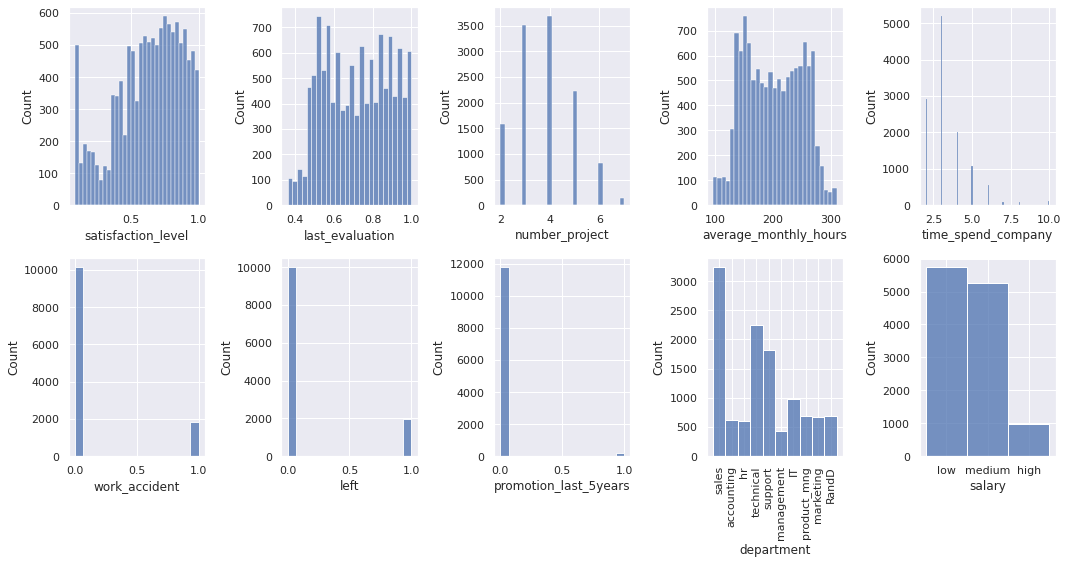

In [13]:
# Create subplots for each column
fig, axes = plt.subplots(2,5, figsize=(15, 8)) 

# Iterate through columns and plot histograms
for i, variable in enumerate(df.columns):
    row = i // 5
    col = i % 5
    sns.histplot(data=df, x=variable, ax=axes[row, col])

axes[1, 3].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [14]:
# Evaluate class balance of categorical variables
df['work_accident'].value_counts(normalize=True)

0    0.845718
1    0.154282
Name: work_accident, dtype: float64

In [15]:
# Evaluate class balance of categorical variables
df['promotion_last_5years'].value_counts(normalize=True)

0    0.983071
1    0.016929
Name: promotion_last_5years, dtype: float64

In [16]:
# Evaluate class balance of categorical variables
df['salary'].value_counts(normalize=True)

low       0.478692
medium    0.438746
high      0.082562
Name: salary, dtype: float64

In [17]:
# Evaluate class balance of categorical variables
df['department'].value_counts(normalize=True)

sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: department, dtype: float64

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [18]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

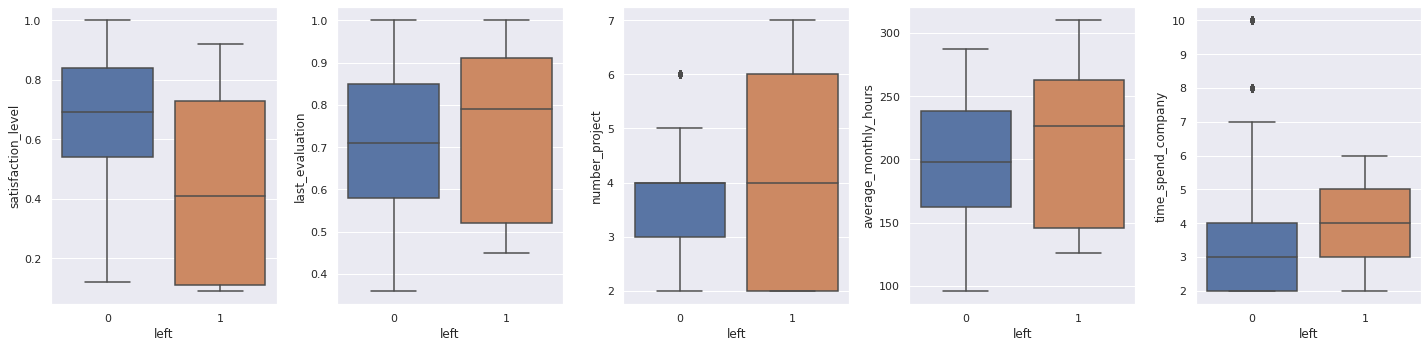

In [19]:
# Explore the impact of each variable on "left"
fig, axes = plt.subplots(1, 5, figsize=(20,5))
sns.boxplot(x=df['left'], y=df['satisfaction_level'], ax=axes[0])
sns.boxplot(x=df['left'], y=df['last_evaluation'], ax=axes[1])
sns.boxplot(x=df['left'], y=df['number_project'], ax=axes[2])
sns.boxplot(x=df['left'], y=df['average_monthly_hours'], ax=axes[3])
sns.boxplot(x=df['left'], y=df['time_spend_company'], ax=axes[4])

plt.tight_layout()

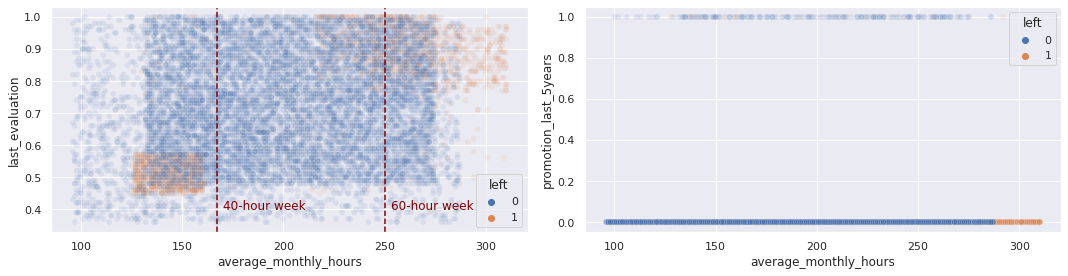

In [20]:
# last_evaluation, number_project and average_monthly_hours all seems to have larger dispersion in the left=1 group
# Explore further the interaction of these variables

fig, axes = plt.subplots(1,2, figsize=(15, 4))

# Hours worked vs. performance evaluation and impact on "left"
sns.scatterplot(x='average_monthly_hours', y='last_evaluation', data=df, hue='left', alpha=0.1, ax=axes[0])
axes[0].axvline(167, linestyle='--', color='maroon')
axes[0].text(170, 0.4, '40-hour week', color='maroon')
axes[0].axvline(250, linestyle='--', color='maroon')
axes[0].text(253, 0.4, '60-hour week', color='maroon')

# Long hours rewarded?
sns.scatterplot(x='average_monthly_hours', y='promotion_last_5years', data=df, hue='left', alpha=0.1, ax=axes[1])

plt.tight_layout()
plt.show()

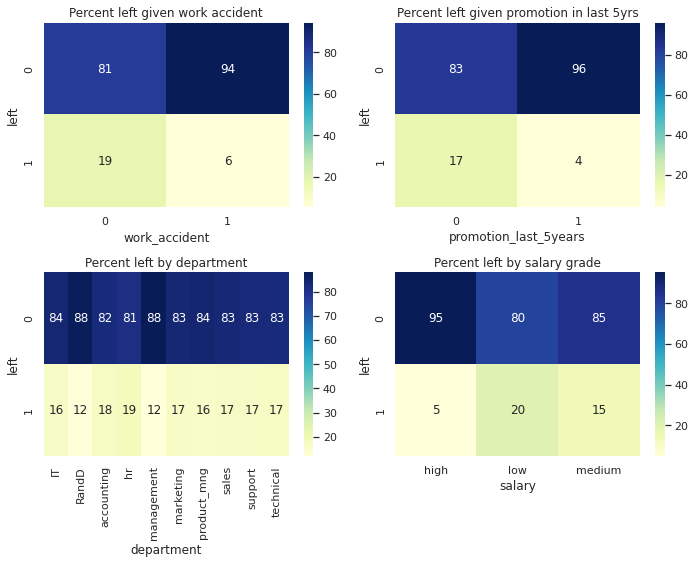

In [21]:
# Construct subplots
fig, axes = plt.subplots(2,2, figsize=(10,8))

# Contingency table: left vs. work_accident
ct_accident = pd.crosstab(df['left'], df['work_accident'], normalize='columns').mul(100)
# Plot heatmap of left vs. work_accident
sns.heatmap(ct_accident, annot=True, cmap="YlGnBu", fmt='.0f', ax=axes[0,0])
axes[0,0].set_title('Percent left given work accident')

# Contingency table: left vs. promotion
ct_promotion = pd.crosstab(df['left'], df['promotion_last_5years'], normalize='columns').mul(100)
# Plot heatmap of left vs. promotion
sns.heatmap(ct_promotion, annot=True, cmap="YlGnBu", fmt='.0f', ax=axes[0,1])
axes[0,1].set_title('Percent left given promotion in last 5yrs')

# Contingency table: left vs. department
ct_dept = pd.crosstab(df['left'], df['department'], normalize='columns').mul(100)
# Plot heatmap of left vs. promotion
sns.heatmap(ct_dept, annot=True, cmap="YlGnBu", fmt='.0f', ax=axes[1,0])
axes[1,0].set_title('Percent left by department')

# Contingency table: left vs. salary grade
ct_salary = pd.crosstab(df['left'], df['salary'], normalize='columns').mul(100)
# Plot heatmap of left vs. promotion
sns.heatmap(ct_salary, annot=True, cmap="YlGnBu", fmt='.0f', ax=axes[1,1])
axes[1,1].set_title('Percent left by salary grade')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

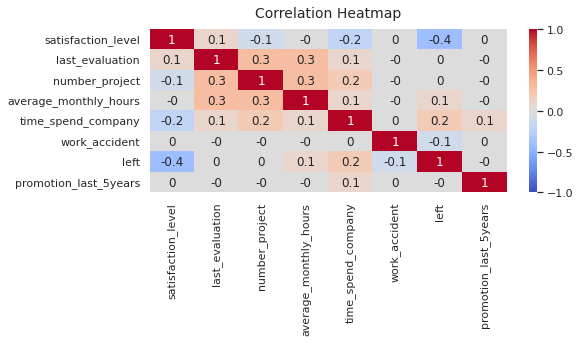

In [30]:
plt.figure(figsize=(8, 3))
heatmap = sns.heatmap(round(df.corr(),1), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Modeling

Add as many cells as you need to conduct the modeling process.

In [31]:
# Encode categorical data
df['salary_num'] = df['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
df = df.drop(['salary'], axis=1)
df = pd.get_dummies(df, drop_first=True)

In [32]:
# Logistic regression is sensitive to outliers, drop them
df_logreg = df[df['time_spend_company']<=upper_limit]

In [36]:
# Define X and y
X_logreg = df_logreg.drop(['left'], axis=1)
y_logreg = df_logreg['left']

# Split into train/test datasets
X_logreg_train, X_logreg_test, y_logreg_train, y_logreg_test = train_test_split(X_logreg, y_logreg, 
                                                                                test_size=0.25, stratify=y_logreg, 
                                                                                random_state=42)

In [37]:
%%time
# Logistic regression
reg = LogisticRegression(random_state=42, max_iter=500).fit(X_logreg_train, y_logreg_train)

CPU times: user 18.5 s, sys: 23.2 s, total: 41.7 s
Wall time: 20.7 s


In [38]:
# Logistic regression prediction and model evaluation
logreg_pred = reg.predict(X_logreg_test)
print(classification_report(y_logreg_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



In [40]:
# Save model evaluation in DataFrame
logreg_accuracy = accuracy_score(y_logreg_test, logreg_pred)
logreg_precision = precision_score(y_logreg_test, logreg_pred)
logreg_recall = recall_score(y_logreg_test, logreg_pred)
logreg_f1 = f1_score(y_logreg_test, logreg_pred)
model_results = pd.DataFrame({'Model': ['Logistic regression'],
                              'Accuracy': [logreg_accuracy],
                              'Precision': [logreg_precision],
                              'Recall': [logreg_recall],
                              'F1': [logreg_f1]})
model_results

,Model,Accuracy,Precision,Recall,F1
0,Logistic regression,0.820201,0.444444,0.26327,0.330667


In [55]:
# Helper function to collect model results from tree-based models

def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table

In [73]:
# Define X and y for tree-based models
X = df.drop(['left'], axis=1)
y = df['left']

# Split into train/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [59]:
%%time
# Random forest

rf = RandomForestClassifier(random_state=42)
cv_params = {'max_depth': [3,4,5], 
             'min_samples_split': [2,3,4],
             'max_features': [5],
             'n_estimators': [200]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1'}
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall', n_jobs=-1, verbose=3)
rf_cv.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  36 | elapsed:   27.4s remaining:   54.9s
[Parallel(n_jobs=-1)]: Done  25 out of  36 | elapsed:   29.4s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   30.8s finished


CPU times: user 1.32 s, sys: 0 ns, total: 1.32 s
Wall time: 31.6 s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [74]:
# Show best estimator
rf_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [60]:
# Inspect best recall score
rf_cv.best_score_

0.8245025160929593

In [94]:
# Random forest prediction on test data
rf_pred = rf_cv.best_estimator_.predict(X_test)

In [90]:
# Save model result
rf_result = make_results('Random forest CV', rf_cv)
model_results = pd.concat([model_results, rf_result])
model_results

,Model,Accuracy,Precision,Recall,F1
0,Logistic regression,0.833556,0.497207,0.178715,0.262925
0,Random forest CV,0.967419,0.975391,0.824503,0.893593


In [77]:
# XGBoost setup
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

cv_params = {'max_depth': [5], 
             'min_child_weight': [3,4,5],
             'learning_rate': [0.1, 0.01],
             'n_estimators': [200]
             }    

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall', n_jobs=-1, verbose=3)

In [78]:
%%time

# XGBoost run
# xgb_cv.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed:   30.0s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:   32.4s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   33.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   33.5s finished


CPU times: user 1min 59s, sys: 0 ns, total: 1min 59s
Wall time: 1min 33s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated

In [79]:
# Pickle model after first run
# with open('xgb_cv.pickle', 'wb') as to_write:
#    pickle.dump(xgb_cv, to_write)

In [80]:
# Read from pickle
with open('xgb_cv.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [91]:
# Use XGB to predict test data
xgb_pred = xgb_cv.best_estimator_.predict(X_test)

# Get model scores
xgb_results = make_results('XGBoost', xgb_cv)
model_results = pd.concat([model_results, xgb_results]).reset_index(drop=True)

In [92]:
model_results

,Model,Accuracy,Precision,Recall,F1
0,Logistic regression,0.833556,0.497207,0.178715,0.262925
1,Random forest CV,0.967419,0.975391,0.824503,0.893593
2,XGBoost,0.980874,0.968250,0.914935,0.940767


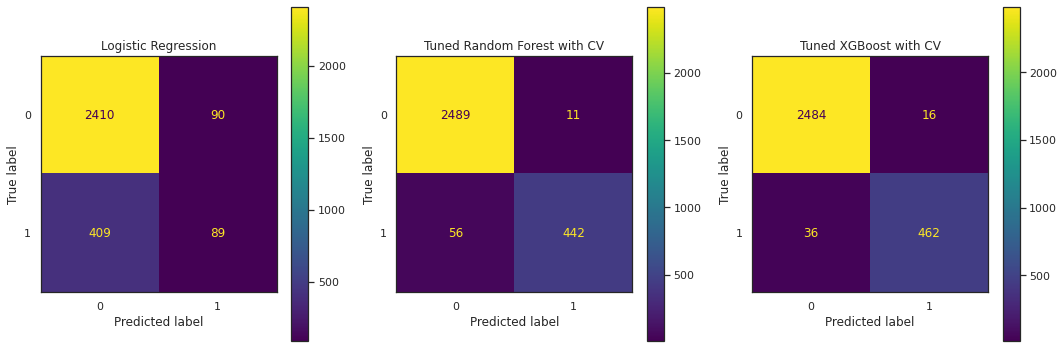

In [119]:
# Plot confusion matrix

# Create confusion matrix for all models
cm_logreg = confusion_matrix(y_logreg_test, logreg_pred)
cm_rf = confusion_matrix(y_test, rf_pred)
cm_xgb = confusion_matrix(y_test, xgb_pred)

# Plot
sns.set_style("white")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
disp1 = ConfusionMatrixDisplay(cm_logreg, display_labels=reg.classes_)
disp1.plot(ax=axes[0], values_format='')

disp2 = ConfusionMatrixDisplay(cm_rf, display_labels=rf_cv.classes_)
disp2.plot(ax=axes[1], values_format='')

disp3 = ConfusionMatrixDisplay(cm_xgb, display_labels=xgb_cv.classes_)
disp3.plot(ax=axes[2], values_format='')

axes[0].set_title('Logistic Regression')
axes[1].set_title('Tuned Random Forest with CV')
axes[2].set_title('Tuned XGBoost with CV')

plt.tight_layout()
plt.show()

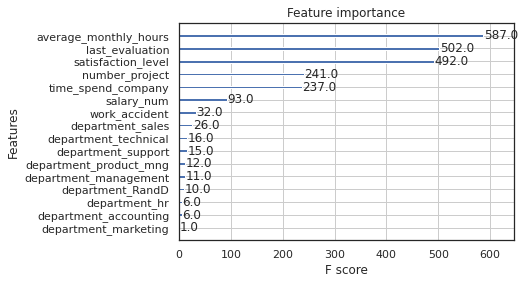

In [133]:
# Plot feature importance
plot_importance(xgb_cv.best_estimator_)



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.